## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

In this project task I plan to apply machine learning models which will forecast the quality of wine by examining its chemical traits and other characteristics. This method involves using regression algorithms such, as Linear Regression and Random Forest Regression to build models for making forecasts, about the quality of wine. 

This strategy seems suitable as it'll help to forecast wine quality based on information, from chemical analyses rather than depending entirely on human taste testers – a method that may be subjective and inconsistent sometimes. By using machine learning algorithms in this process of evaluating wine quality can help automation, enhance efficiency and scalability for businesses. Furthermore these models can pinpoint factors such, as alcohol levels or acidity that greatly influence quality standards; thus offering guidance to winemakers looking to enhance their production methods. 

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**


In order to figure out what makes red wine good, We need to look at a bunch of different things. First, there's all this science stuff - like how acidic the wine is, its pH level, how much sugar it has, and other chemical things. Labs do tests to figure all that out.
But it's not just about that, We also need to know how the wine was made, we even need wine experts to taste it and tell us what they think! They look at stuff like the color and how it smells.
We take all of this info - the lab results, how it's made, and what the experts say - and mix it all together. This helps us guess how good a wine will be and figure out what really matters when making awesome red wine

### Data Collection

**Q3. From where do we get our data?**


We can get our data from many open-source websites where various datasets available such as Kaggle, data.world, GitHub, Google Dataset Search and other sources

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

The red wine samples are obtained from the north of Portugal

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

Understanding the impact of each variable on red wine quality can help businesses in several ways like having quality control, improving cost efficiency, improving product development, increasing market positioning, managing risks, and achieving competitive advantage.

*TODO*
<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary</li>

In [15]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

In [4]:
# Load the data in pandas dataframe
df = pd.read_csv("winequality-red.csv")

In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
# Checking shape of the data set and datatypes
print("Shape of the dataset is: ", df.shape)
print("\n\n Datatypes of the Dataset are: \n\n", df.dtypes)

Shape of the dataset is:  (1599, 12)


 Datatypes of the Dataset are: 

 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [8]:
# Describing the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Data Preparation

#### Explore the dataset further
*TODO*
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

In [13]:
# 1. Check for missing values and handle if any

missing_values = df.isnull().sum()
print("Missing values in the dataset:\n", missing_values)

print("\nThere are no missing values in the dataset")

# Handling missing values (if any)

df.fillna(df.mean(), inplace=True)

print("\nMissing values handled (if any were present).")

Missing values in the dataset:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in the dataset

Missing values handled (if any were present).


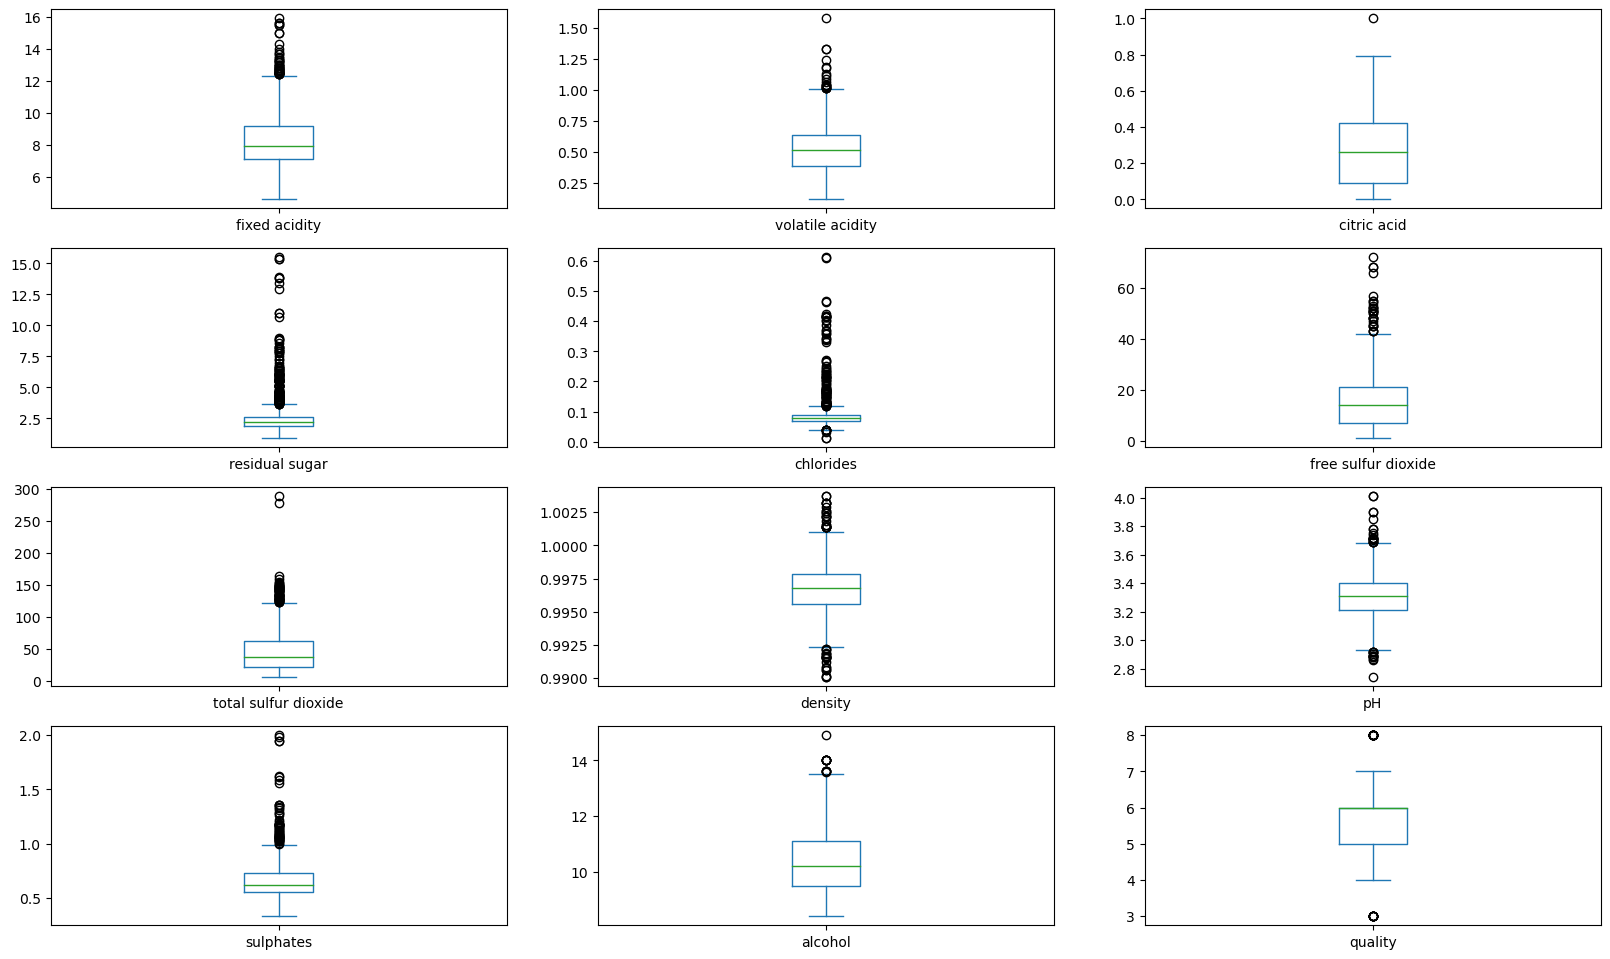

In [18]:
# 2. Check for outliers if any and handle them

df.plot(kind="box",subplots=True,layout=(5,3),figsize=(20,15));


In [22]:
# Check for outliers using Z-score normalization

z_scores = np.abs(zscore(df))
threshold = 3
outliers = np.where(z_scores > threshold)

print(f"\nOutliers found at positions: \n{outliers}")
print(f"\nDataset shape before removing outliers: {df.shape}")
# Removing the outliers
df_cleaned = df[(z_scores < 3).all(axis=1)]
print(f"\nDataset shape after removing outliers: {df_cleaned.shape}")


Outliers found at positions: 
(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 

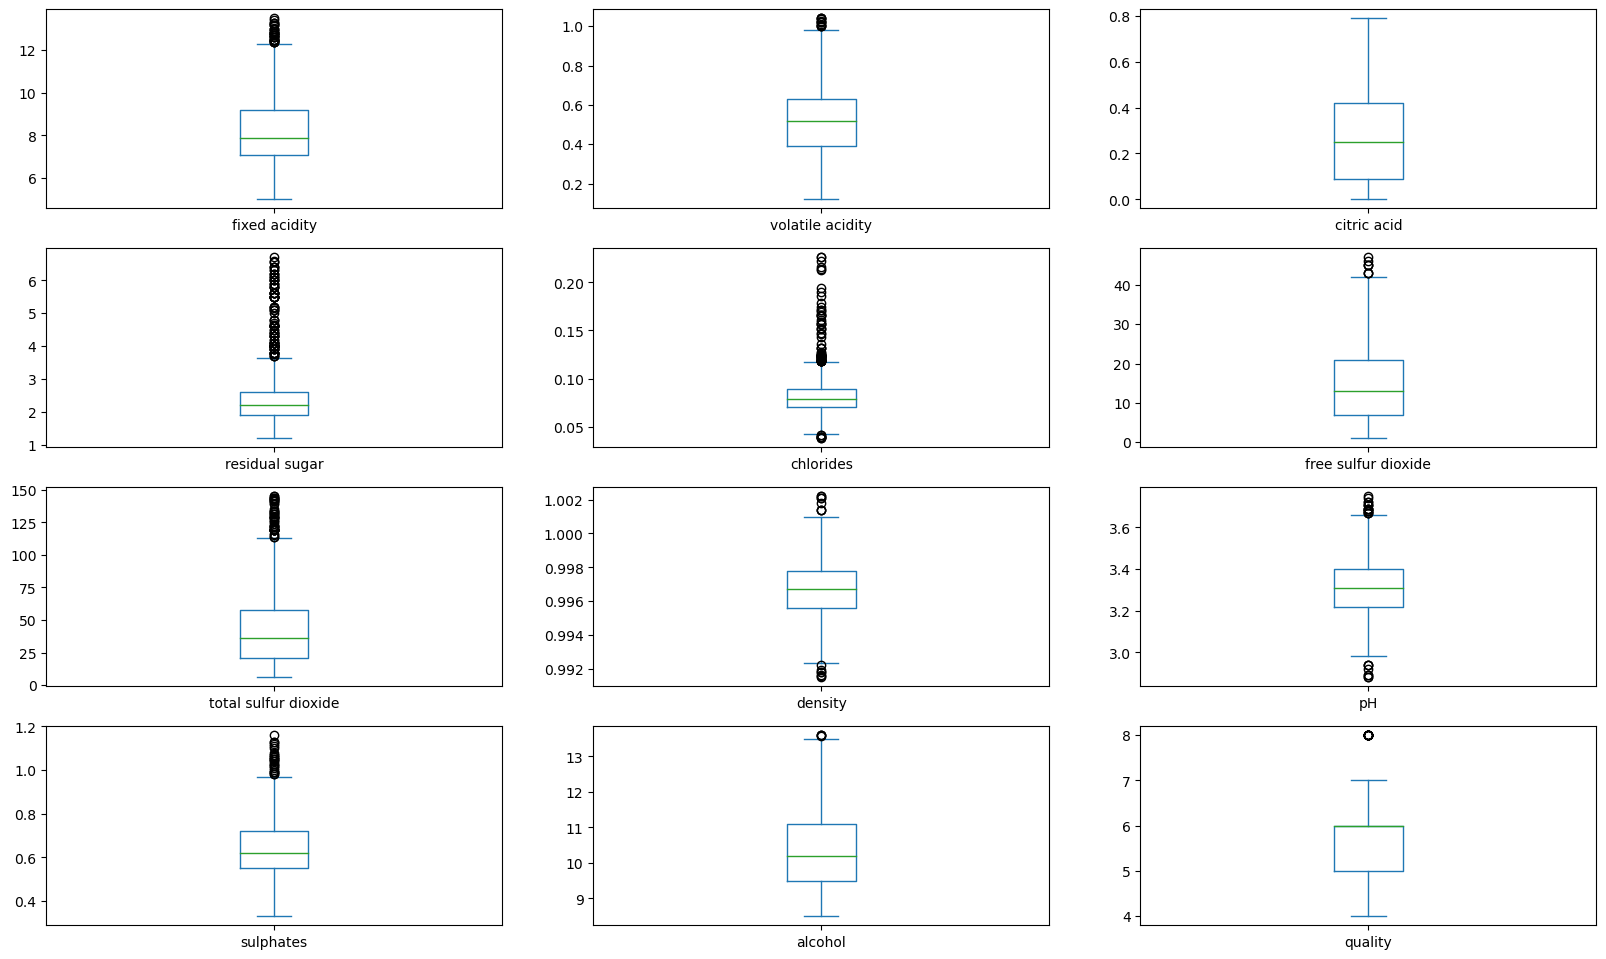

In [23]:
df_cleaned.plot(kind="box",subplots=True,layout=(5,3),figsize=(20,15));

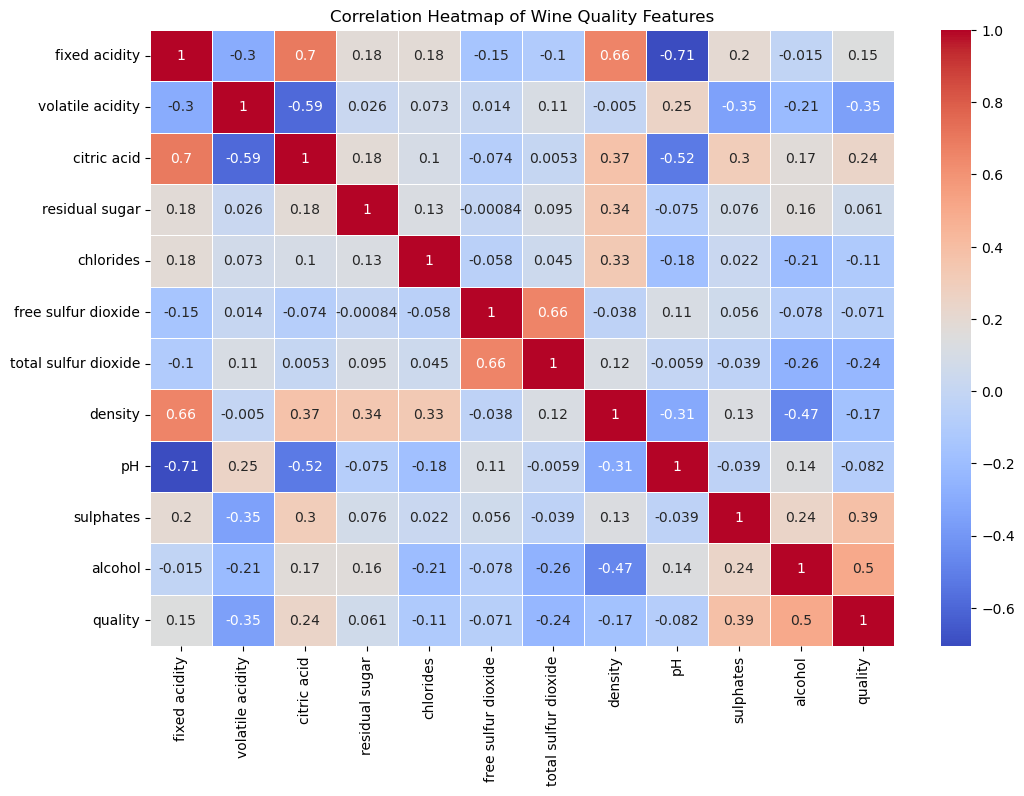

In [25]:
# 3. Implement Correlation heatmap

plt.figure(figsize=(12, 8))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Wine Quality Features")
plt.show()

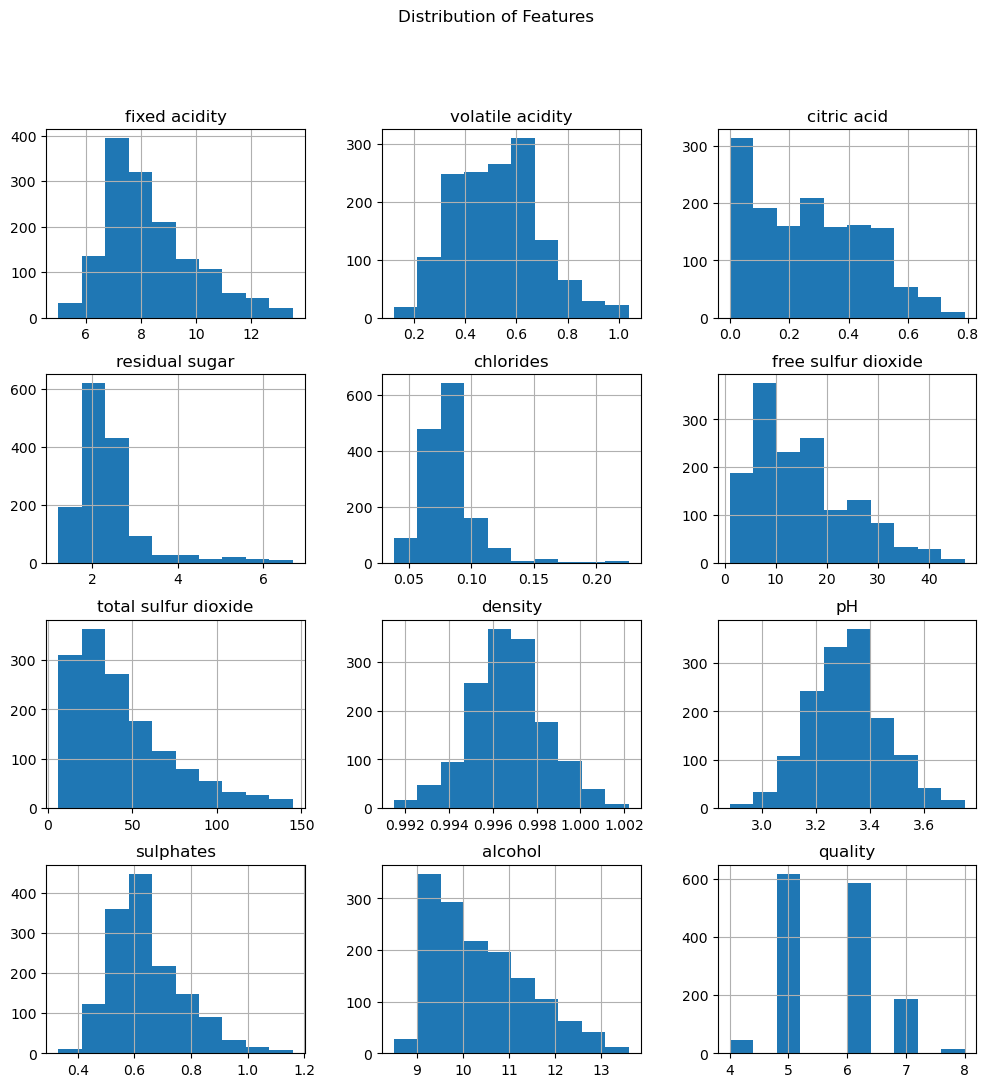

In [28]:
# 4. Check the distribution of data using histograms

df_cleaned.hist(figsize=(12, 12))
plt.suptitle("Distribution of Features")
plt.show()


In [29]:
# 5. Prepare the data for modeling by carrying out any steps that you think are necessary

X = df_cleaned.iloc[:, :-1]  # Features
y = df_cleaned.iloc[:, -1]   # Target (quality)

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

Features (X) shape: (1451, 11)
Target (y) shape: (1451,)


### Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>

In [31]:
# Importing necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Implementing Multivariable Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# 3. Implementing Random Forest Regression
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "formulae.png">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

*TODO*
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

In [35]:
# Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance

# 4. Making predictions using both models
y_pred_lr = linear_regressor.predict(X_test)  # Predictions from Linear Regression
y_pred_rf = random_forest_regressor.predict(X_test)  # Predictions from Random Forest

# 5. Evaluating the performance of both models using R-Squared, RMSE, and MAE

# For Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# For Random Forest Regression
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)




In [34]:
# Compare these 3 metrics for the two models and analyze the performance

# 6. Printing the evaluation metrics
print("Linear Regression Performance:")
print(f"R-squared: {r2_lr}")
print(f"RMSE: {rmse_lr}")
print(f"MAE: {mae_lr}")

print("\nRandom Forest Regression Performance:")
print(f"R-squared: {r2_rf}")
print(f"RMSE: {rmse_rf}")
print(f"MAE: {mae_rf}")

Linear Regression Performance:
R-squared: 0.3363003617893182
RMSE: 0.657656913591242
MAE: 0.5108301341783433

Random Forest Regression Performance:
R-squared: 0.4300357060017397
RMSE: 0.6094490780156764
MAE: 0.4400687285223368


Here R-squared value is greater, Root Mean Squared Error and Mean Absolute Error are lower for Random Forest Regression model so this model is better as compared to Linear Regression model

Feature Importances:
                  Feature  Importance
10               alcohol    0.301093
9              sulphates    0.138110
1       volatile acidity    0.104255
6   total sulfur dioxide    0.076730
8                     pH    0.064300
2            citric acid    0.062877
4              chlorides    0.060068
7                density    0.053377
3         residual sugar    0.048715
0          fixed acidity    0.048088
5    free sulfur dioxide    0.042387


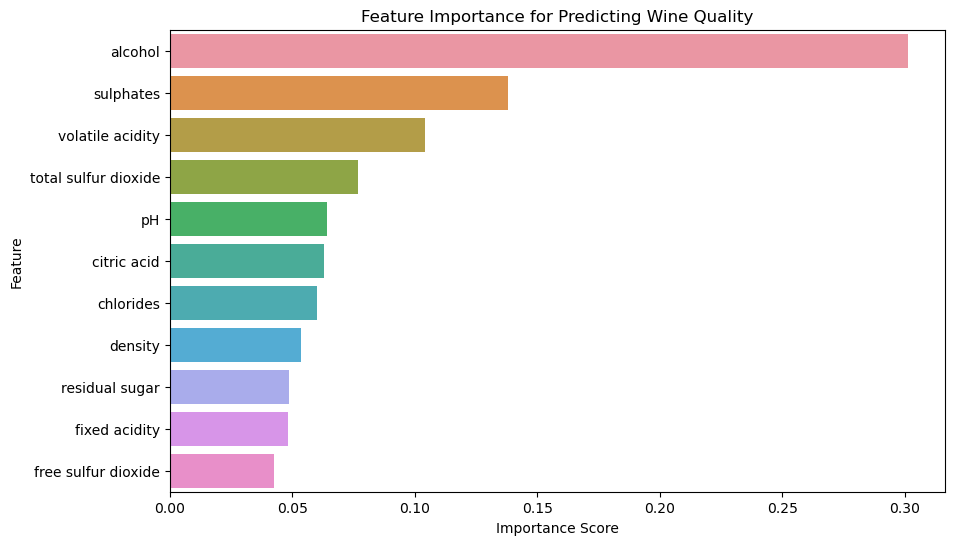

In [38]:
# Calculate the feature importance scores for the top features that help predicting wine quality and visualize them


# Feature importance calculation for Random Forest
importances = random_forest_regressor.feature_importances_
feature_names = X.columns  # Extract feature names

# Creating a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sorting features by importance (highest to lowest)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Printing the top features
print("Feature Importances:\n", feature_importance_df)

# Visualizing feature importance using a bar plot

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Predicting Wine Quality')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


### Conclusion

In this analysis, I aimed to predict red wine quality using chemical properties and compare the performance of two regression models: Linear Regression and Random Forest Regression. The key insights obtained are:
- Random Forest Regression outperformed Linear Regression, with a higher R-squared (0.43 vs 0.34).
- RMSE and MAE values were lower for Random Forest, meaning it made more accurate predictions.
- The most important features influencing wine quality were alcohol, sulphates, and volatile acidity, showing their  role in determining the wine's overall quality.

One limitation of this analysis is that we only used two regression algorithms, which may not cover all possible perspectives for feature importance or prediction accuracy. Additionally, the dataset might have other underlying relationships that are not captured well by these models.

For future work, I would explore using more advanced algorithms to potentially improve prediction performance. I would also consider incorporating additional data, such as sensory evaluations, to enrich the model's ability to predict wine quality based on more diverse factors.